# 서울시 구별 CCTV 현황 분석하기

### 작성 : [PinkWink](http://pinkwink.kr) 

* 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
* 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
* Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
* Pandas와 Matplotlib의 기본적 사용법을 확인
* 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인
* https://github.com/PinkWink/DataScience/tree/master/data

In [1]:
import pandas as pd

In [2]:
#서울 열린광장 데이터cctv -> 
CCTV_Seoul = pd.read_csv('../data/python_data/01. CCTV_in_Seoul.csv')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

## 판다스 DataFrame의 칼럼이름 변경하기
* df.rename(columns = {'old_nm' : 'new_nm'}, inplace = True)
* df.columns = ['a', 'b']

In [5]:
CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0] : '구별'}, inplace = True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0] : '기관명'}, inplace = True)
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [7]:
CCTV_Seoul.rename(columns = {'구별' : '기관명', '소계': '소계1'}, inplace = True)

In [8]:
CCTV_Seoul.columns = ['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년']
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### 서울시 주민등록인구 (구별) 통계
https://data.seoul.go.kr/dataList/419/S/2/datasetView.do

In [9]:
pop_Seoul = pd.read_excel('../data/python_data/01. population_in_Seoul.xls', 
                          header = 2,  # 위에서부터 2번째 행부터 가져옴
                         usecols = 'B, D, G, J, N')  #column 이름이 B,D,G,J,N인 값들을 가져온다
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [10]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                            pop_Seoul.columns[1] : '인구수',
                            pop_Seoul.columns[2] : '한국인',
                            pop_Seoul.columns[3] : '외국인',
                            pop_Seoul.columns[4] : '고령자'
                           }, inplace = True )  
pop_Seoul.head(2)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0


In [11]:
import pandas as pd
import numpy as np

In [12]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [13]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, 
                  columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,-0.216176,0.774000,-0.284496,-0.335374
2013-01-02,-0.924280,-0.470490,0.468450,0.309223
2013-01-03,0.194166,-1.417706,0.266518,1.045917
2013-01-04,0.575256,0.593287,-3.084167,-1.179118
2013-01-05,0.078758,-0.654058,-1.981214,-0.419812
2013-01-06,-0.087971,-0.787979,1.007487,-1.313966


In [15]:
df.head()

,A,B,C,D
2013-01-01,-0.216176,0.774000,-0.284496,-0.335374
2013-01-02,-0.924280,-0.470490,0.468450,0.309223
2013-01-03,0.194166,-1.417706,0.266518,1.045917
2013-01-04,0.575256,0.593287,-3.084167,-1.179118
2013-01-05,0.078758,-0.654058,-1.981214,-0.419812


In [16]:
df['A']

2013-01-01   -0.216176
2013-01-02   -0.924280
2013-01-03    0.194166
2013-01-04    0.575256
2013-01-05    0.078758
2013-01-06   -0.087971
Freq: D, Name: A, dtype: float64

# CCTV 데이터 파악하기

In [17]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [18]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [19]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [20]:
CCTV_Seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [21]:
CCTV_Seoul['최근증가율'] = ( CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년'] ) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [22]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [23]:
# 구 이름이 아닌 nan이 보임
pop_Seoul['구별'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [24]:
# isnull 명령어로 누락값 데이터 추출
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [25]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [26]:
#필요한 컬럼 추가
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


In [27]:
# 인구수는 송파구, 강서구, 강남구, 노원구, 관악구 순으로 많다.
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883


In [28]:
# 외국인 숫자는 영등포구, 구로구, 금천구, 관악구, 동대문구 순으로 많다.
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [29]:
# 외국인 비율이 높은 구는 영등포구, 금천구, 구로구, 중구, 용산구 순이다.
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [30]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883


In [31]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# 7. CCTV 데이터와 인구 데이터 합치고 분석하기

In [32]:
import numpy as np

In [33]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [34]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [35]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [36]:
# CCTV 개수와 외국인 비율과는 큰 의미가 없음
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [37]:
# 인구수와는 0.3으로 약한 상관관계
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [38]:
data_result.sort_values(by='소계', ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [39]:
data_result.sort_values(by='인구수', ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# CCTV 와 인구현황 그래프로 분석하기

In [40]:
import matplotlib.pyplot as plt  
from matplotlib import font_manager, rc   #폰트추가(한글깨지지 않도록)
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname = f_path).get_name()
rc('font', family = font_name)

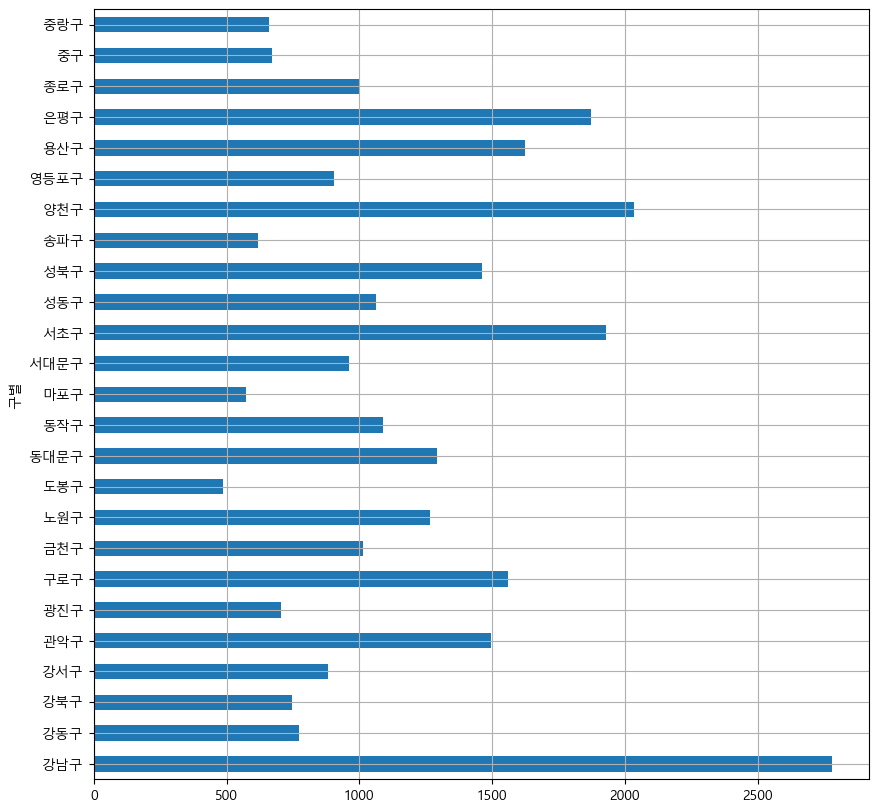

In [41]:
plt.figure()
data_result['소계'].plot(kind='barh', grid = True, figsize=(10,10))
plt.show()

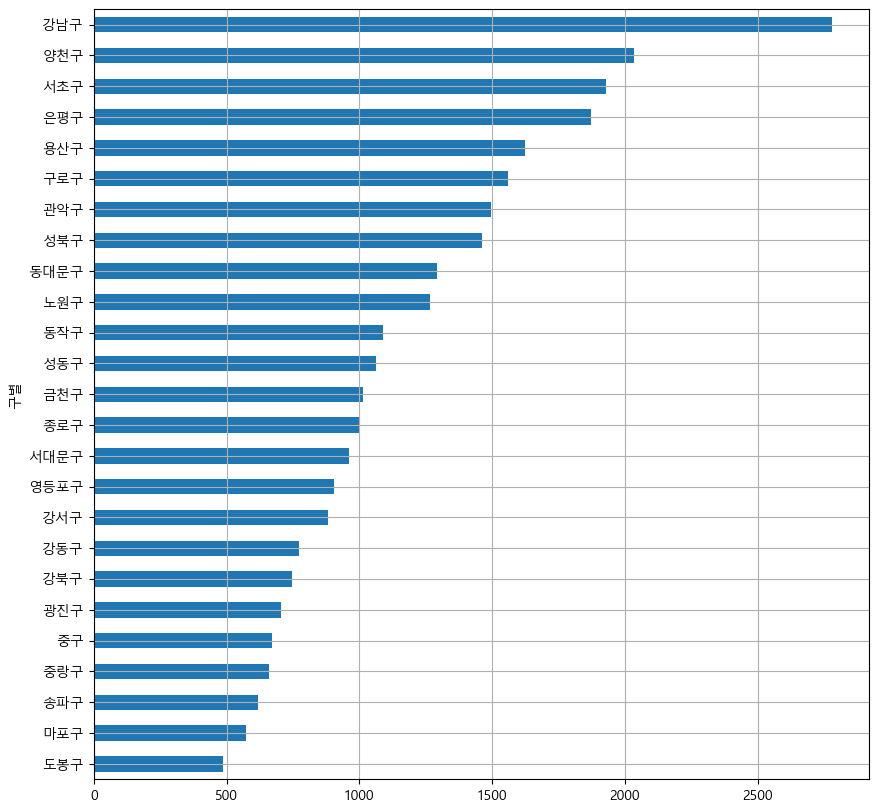

In [42]:
# 강남구에 cctv가 많이 설치되어있음을 확인
data_result['소계'].sort_values().plot(kind = 'barh',grid = True, figsize=(10,10))
plt.show()

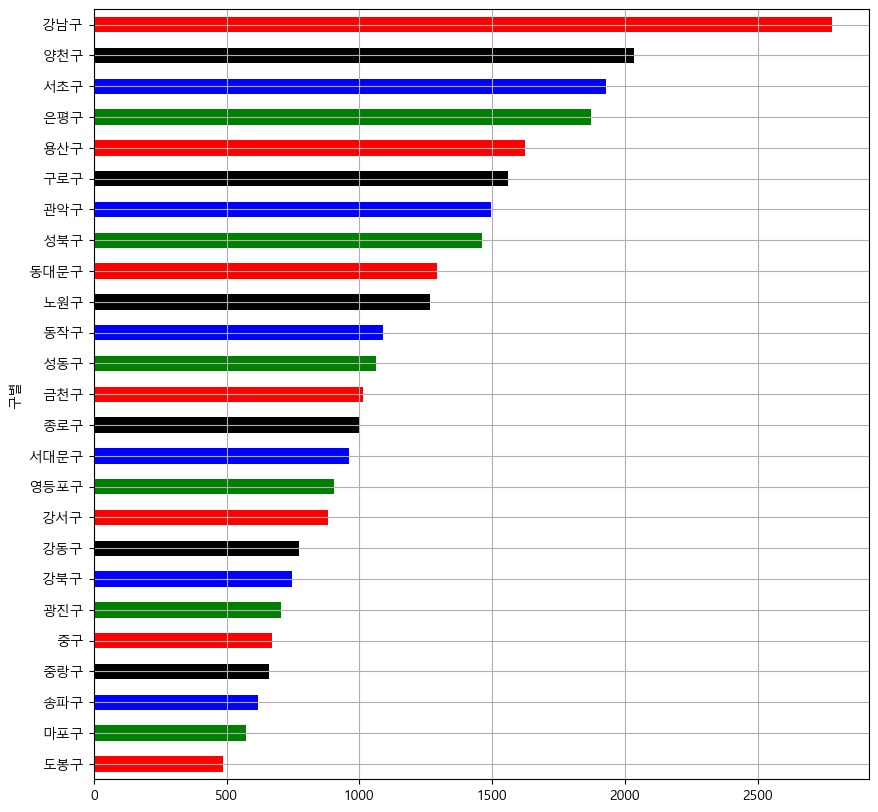

In [43]:
import seaborn as sns
colors = list('rgbk')
data_result['소계'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,10), color = colors)
plt.show()

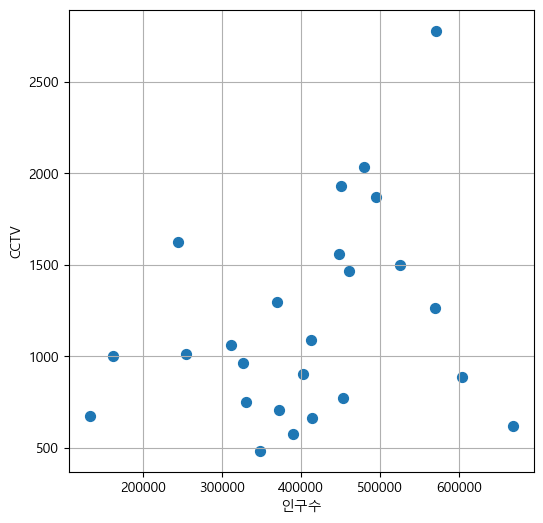

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)  #산점도 그래프 size=50
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [45]:
# 기울기, 절편, 1차원
# y = ax+b(a는 기울기, b는 y절편)
fp1 = np.polyfit(data_result['인구수'],data_result['소계'], 1)  # 기울기와 절편을 구해주는 함수. np.polyfit. 1은 일차함수
fp1

array([1.30916415e-03, 6.45066497e+02])

In [46]:
# polynomial
f1 = np.poly1d(fp1) # 매개변수로부터 모델 생성
fx = np.linspace(100000, 700000, 100) # 시작, 끝(포함), 갯수
print(fx)

[100000.         106060.60606061 112121.21212121 118181.81818182
 124242.42424242 130303.03030303 136363.63636364 142424.24242424
 148484.84848485 154545.45454545 160606.06060606 166666.66666667
 172727.27272727 178787.87878788 184848.48484848 190909.09090909
 196969.6969697  203030.3030303  209090.90909091 215151.51515152
 221212.12121212 227272.72727273 233333.33333333 239393.93939394
 245454.54545455 251515.15151515 257575.75757576 263636.36363636
 269696.96969697 275757.57575758 281818.18181818 287878.78787879
 293939.39393939 300000.         306060.60606061 312121.21212121
 318181.81818182 324242.42424242 330303.03030303 336363.63636364
 342424.24242424 348484.84848485 354545.45454545 360606.06060606
 366666.66666667 372727.27272727 378787.87878788 384848.48484848
 390909.09090909 396969.6969697  403030.3030303  409090.90909091
 415151.51515152 421212.12121212 427272.72727273 433333.33333333
 439393.93939394 445454.54545455 451515.15151515 457575.75757576
 463636.36363636 469696.9

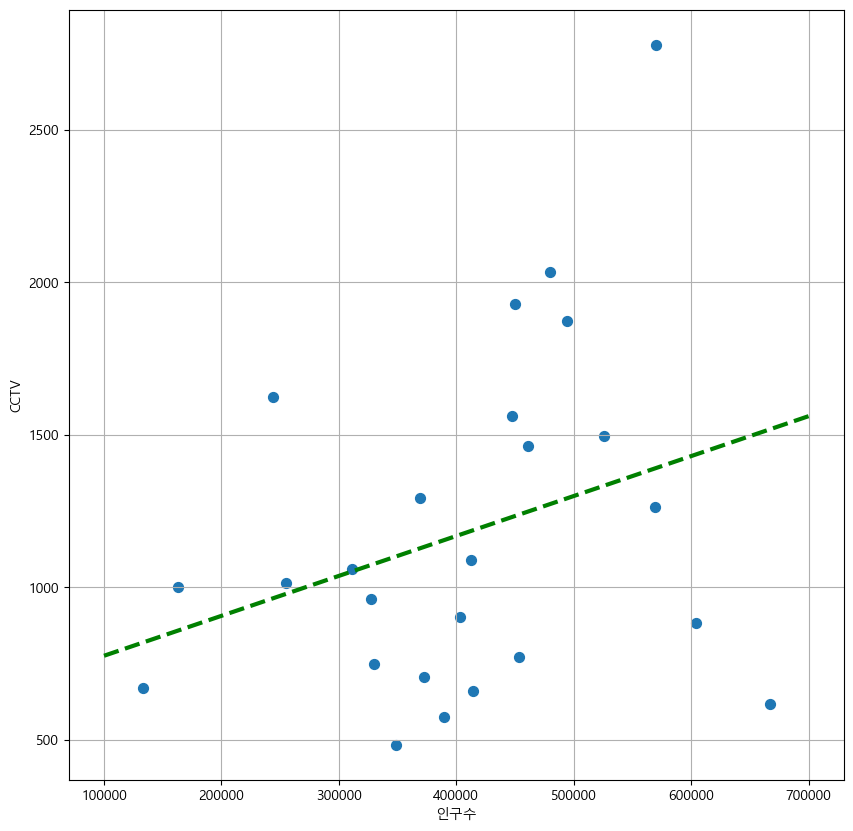

In [47]:
# 그래프에서 인구 300,000일때 cctv 1,100 대 정도가 적절하다.

plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)  #산점도 그래프 size=50
plt.plot(fx, f1(fx), ls='dashed', lw = 3, color = 'g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# 7. 조금더 설득력 있는 자료 만들기

In [48]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,659.231690


In [49]:
print(f1(data_result['인구수']))

[1391.94464487 1238.42289235 1077.34202601 1435.50315451 1333.05189553
 1132.29026377 1231.40708166  979.01070661 1390.48361768 1101.50134126
 1128.79741381 1185.12289226 1155.18099895 1073.3765678  1234.59620553
 1052.53598367 1248.93155299 1518.91131175 1273.43648757 1172.64001207
  964.76830981 1292.30154299  858.22460369  819.4995281  1187.71896477]


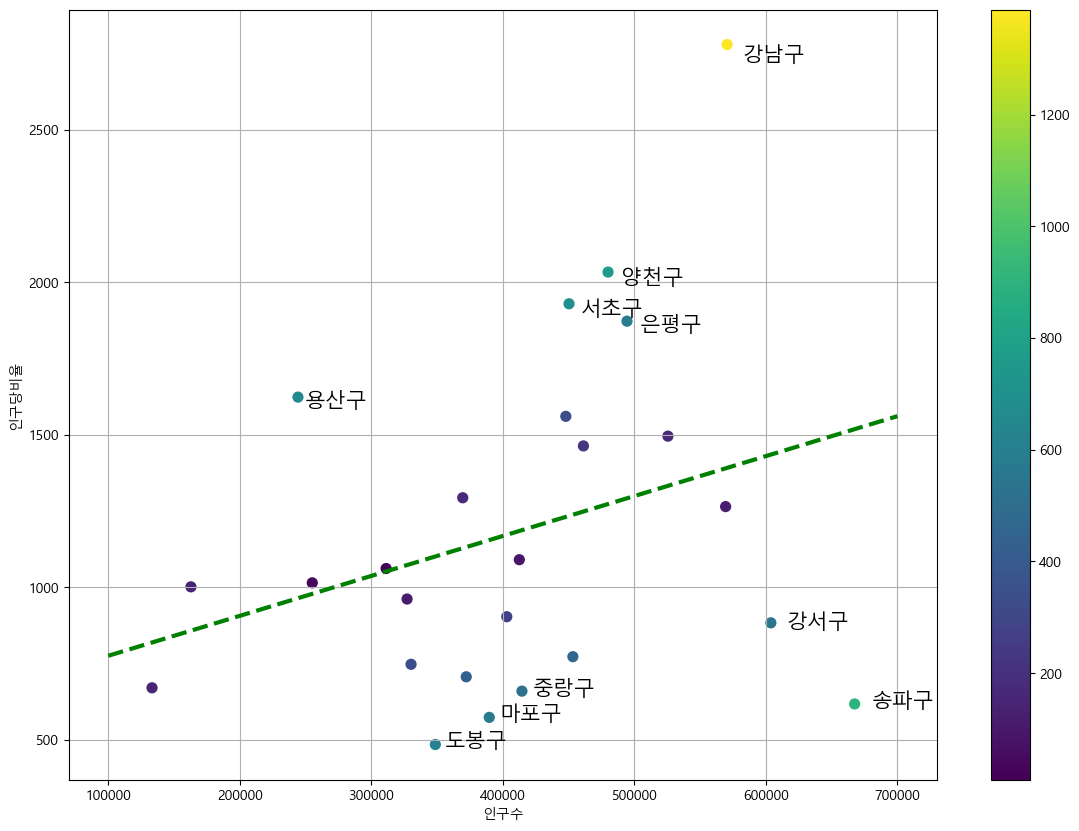

In [50]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다

# 연습문제
1. 2022년도 4/4분기 연구현황을 파악하고
2. CCTV 관련 
    최근 3년간 증가율 = (2022 + 2021 + 2020) / 2019년도 이전 *100
3. cctv 와 인구 관련 상관관계가 가장 높은 요소를 찾아내고 최종적으로 의미있는 그래프를 그려보세요.

In [63]:
CCTV_Seoul_2022 = pd.read_csv('C:/Users/lenovo/Downloads/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv', encoding='cp949')

In [64]:
col = CCTV_Seoul_2022.columns[0:13]
CCTV_Seoul_2022 = pd.read_csv('C:/Users/lenovo/Downloads/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv', encoding='cp949', usecols = col)
CCTV_Seoul_2022.head()

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,계,"91,341","2,804","3,097","3,981","6,576","8,850","11,566","11,024","13,151","11,912","9,144","9,236"
1,종로구,"1,980",36,540,107,161,131,158,152,69,250,85,291
2,중 구,"2,584",130,87,77,236,240,372,386,155,361,403,137
3,용산구,"2,847",44,50,68,83,295,491,115,322,623,422,334
4,성동구,"4,047",58,99,110,366,279,945,459,647,485,367,232


In [67]:
CCTV_Seoul_2022.rename(columns = {CCTV_Seoul_2022.columns[2] : '2013년이전설치된CCTV'}, inplace = True)  #column명 변경

In [68]:
CCTV_Seoul_2022.head()

,구분,총계,2013년이전설치된CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,계,"91,341","2,804","3,097","3,981","6,576","8,850","11,566","11,024","13,151","11,912","9,144","9,236"
1,종로구,"1,980",36,540,107,161,131,158,152,69,250,85,291
2,중 구,"2,584",130,87,77,236,240,372,386,155,361,403,137
3,용산구,"2,847",44,50,68,83,295,491,115,322,623,422,334
4,성동구,"4,047",58,99,110,366,279,945,459,647,485,367,232
